# 2020 Rolex 24 Hours of Daytona

Leader board at [IMSA Scoring](https://scoring.imsa.com/)
 
Data from [IMSA Results](http://results.imsa.com/). "Time Cards" csv is cumulative since the start. Read in most recent time card file for updated plots.

## To Do
- for cars with time data in past x_minutes, add time=most recent time entry of leader and lap = max lap completed by car

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime, timedelta
from matplotlib.dates import date2num, datestr2num, num2date
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()
mpl.rcParams['font.sans-serif'] = "AppleGothic"
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

In [2]:
# 2020 data
data = pd.read_csv("./data/timecards-2020.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False).fillna(0)
timeformat = '%H:%M:%S.%f'
data['time'] = pd.to_datetime(data.loc[:,'HOUR'], format=timeformat)
#add a day to values before start time
data.loc[(data['time'] < data.iloc[1,:].loc['time']) & (data['LAP_NUMBER'] > 1),'time'] = data.loc[(data['time'] < data.iloc[1,:].loc['time']) & (data['LAP_NUMBER'] > 1),'time'] + (timedelta(days=1))
start = data['time'].iloc[0] - pd.to_datetime(data['LAP_TIME'].iloc[0], format='%M:%S.%f')
data['time2'] = data['time'] - start
data = data.fillna(0)
data = data.loc[data['LAP_NUMBER'] > 2]
data.head(2)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,Unnamed: 25,time,time2
2,10,1,3,1:36.800,0,0,32.092,0,36.228,0,28.480,0,213.1,4:54.167,13:45:41.080,0:32.092,0:36.228,0:28.480,0.0,Ryan Briscoe,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 13:45:41.080000000,1900-01-01 00:04:54.167000128
3,10,1,4,1:36.346,0,0,31.815,0,36.207,0,28.324,0,214.1,6:30.513,13:47:17.426,0:31.815,0:36.207,0:28.324,0.0,Ryan Briscoe,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 13:47:17.425999872,1900-01-01 00:06:30.513000000


In [3]:
# 2019 data2
data2 = pd.read_csv("./data/timecards-2019.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False).fillna(0)
timeformat = '%H:%M:%S.%f'
data2['time'] = pd.to_datetime(data2.loc[:,'HOUR'], format=timeformat)
#add a day to values before start time
data2.loc[(data2['time'] < data2.iloc[1,:].loc['time']) & (data2['LAP_NUMBER'] > 1),'time'] = data2.loc[(data2['time'] < data2.iloc[1,:].loc['time']) & (data2['LAP_NUMBER'] > 1),'time'] + (timedelta(days=1))
start = data2['time'].iloc[0] - pd.to_datetime(data2['LAP_TIME'].iloc[0], format='%M:%S.%f')
data2['time2'] = data2['time'] - start
data2 = data2.fillna(0)
data2 = data2.loc[data2['LAP_NUMBER'] > 2]
data2.head(2)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,Unnamed: 25,time,time2
2,10,2,3,1:36.530,0,0,50.350,0,26.499,0,19.681,0,213.7,4:54.670,14:41:02.556,0:50.350,0:26.499,0:19.681,312.7,Jordan Taylor,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R.,Cadillac,0.0,1900-01-01 14:41:02.556,1900-01-01 00:04:54.670000128
3,10,2,4,1:36.312,0,0,50.175,0,26.493,0,19.644,0,214.1,6:30.982,14:42:38.868,0:50.175,0:26.493,0:19.644,311.2,Jordan Taylor,0,DPi,0.0,Konica Minolta Cadillac DPi-V.R.,Cadillac,0.0,1900-01-01 14:42:38.868,1900-01-01 00:06:30.982000128


In [4]:
# 2018 data3
data3 = pd.read_csv("./data/timecards-2018.csv", delimiter=";", header=0, skipinitialspace=True, index_col=False).fillna(0)
timeformat = '%H:%M:%S.%f'
data3['time'] = pd.to_datetime(data3.loc[:,'HOUR'], format=timeformat)
#add a day to values before start time
data3.loc[(data3['time'] < data3.iloc[1,:].loc['time']) & (data3['LAP_NUMBER'] > 1),'time'] = data3.loc[(data3['time'] < data3.iloc[1,:].loc['time']) & (data3['LAP_NUMBER'] > 1),'time'] + (timedelta(days=1))
start = data3['time'].iloc[0] - pd.to_datetime(data3['LAP_TIME'].iloc[0], format='%M:%S.%f')
data3['time2'] = data3['time'] - start
data3 = data3.fillna(0)
data3 = data3.loc[data3['LAP_NUMBER'] > 2]
data3.head(2)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,Unnamed: 25,time,time2
2,10,1,3,1:38.985,0,0,51.718,0,27.284,0,19.983,0,208.4,5:00.476,14:45:06.562,0:51.718,0:27.284,0:19.983,304.8,Renger Van Der Zande,0,P,0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 14:45:06.561999872,1900-01-01 00:05:00.475999872
3,10,1,4,1:39.086,0,0,51.580,0,27.460,0,20.046,0,208.1,6:39.562,14:46:45.648,0:51.580,0:27.460,0:20.046,304.0,Renger Van Der Zande,0,P,0,Konica Minolta Cadillac DPi-V.R,Cadillac,0.0,1900-01-01 14:46:45.648000000,1900-01-01 00:06:39.562000000


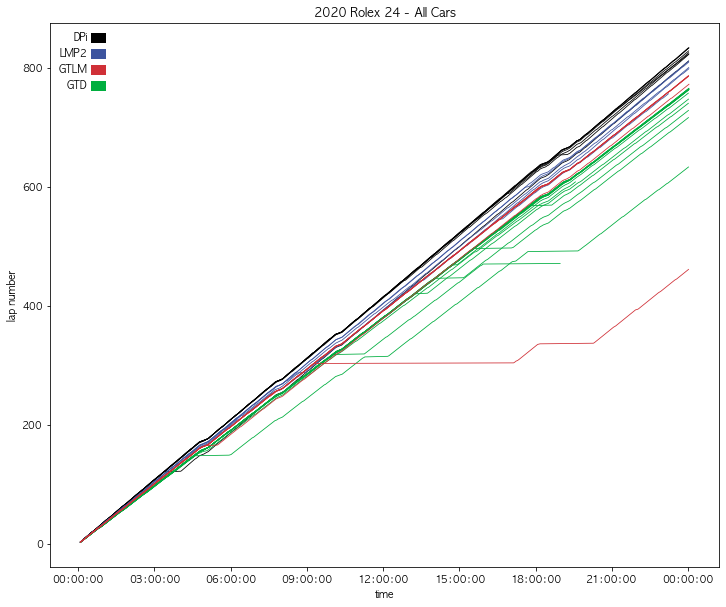

In [5]:
# 2020 all cars
fig, ax = plt.subplots(figsize=(12,10))
classes = ("DPi", "GTD", "LMP2", "GTLM")
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
for c in classes:
    temp = data.loc[data['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data['NUMBER'] == i]
        ax.plot_date(plotdata['time2'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=.8,\
                     color=color)
plt.ylabel("lap number")
plt.xlabel("time")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.title("2020 Rolex 24 - All Cars")
hues = ["k", "#3d549f", "#d03037", "#00ae3f"]
texts = ["DPi", "LMP2", "GTLM", "GTD"]
patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                     label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, framealpha=0, markerfirst=False, numpoints=1, fancybox=True, handlelength=.5);
#plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
#plt.ylim(240,320)

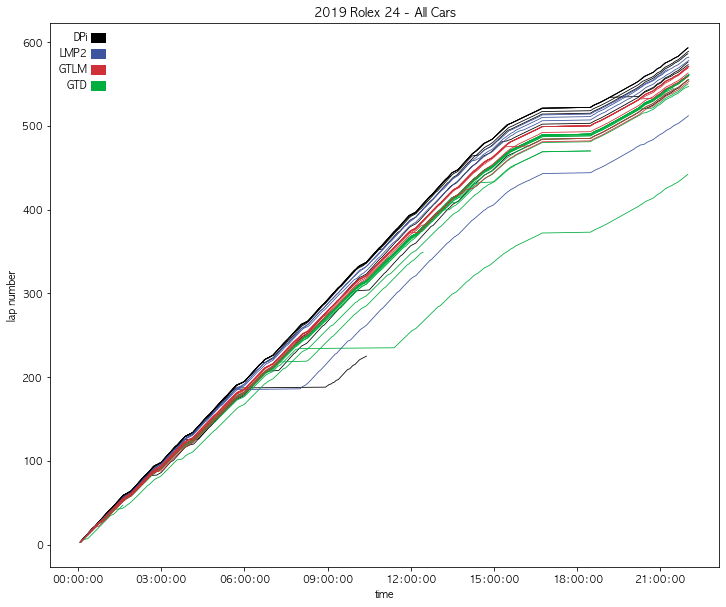

In [6]:
# 2019 all cars
fig, ax = plt.subplots(figsize=(12,10))
classes = ("DPi", "GTD", "LMP2", "GTLM")
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
for c in classes:
    temp = data2.loc[data2['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data2['NUMBER'] == i]
        ax.plot_date(plotdata['time2'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=.8,\
                     color=color)
plt.ylabel("lap number")
plt.xlabel("time")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.title("2019 Rolex 24 - All Cars")
hues = ["k", "#3d549f", "#d03037", "#00ae3f"]
texts = ["DPi", "LMP2", "GTLM", "GTD"]
patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                     label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, framealpha=0, markerfirst=False, numpoints=1, fancybox=True, handlelength=.5);
#plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
#plt.ylim(240,320)

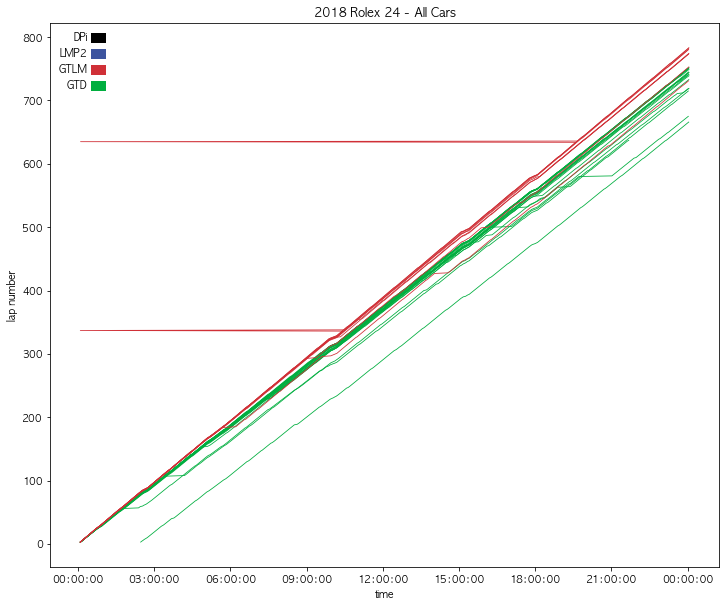

In [7]:
# 2018 all cars
fig, ax = plt.subplots(figsize=(12,10))
classes = ("DPi", "GTD", "LMP2", "GTLM")
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
for c in classes:
    temp = data3.loc[data3['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data3['NUMBER'] == i]
        ax.plot_date(plotdata['time2'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=.8,\
                     color=color)
plt.ylabel("lap number")
plt.xlabel("time")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.title("2018 Rolex 24 - All Cars")
hues = ["k", "#3d549f", "#d03037", "#00ae3f"]
texts = ["DPi", "LMP2", "GTLM", "GTD"]
patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                     label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, framealpha=0, markerfirst=False, numpoints=1, fancybox=True, handlelength=.5);
#plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
#plt.ylim(240,320)

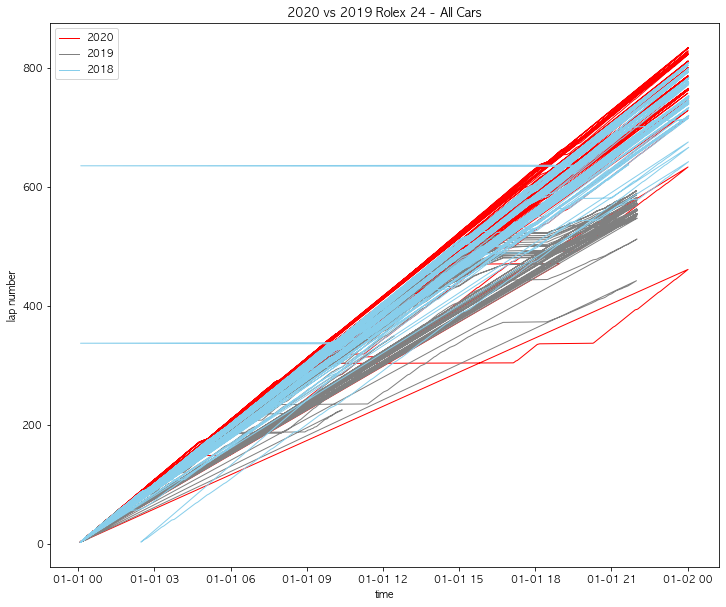

In [8]:
# 2018 vs 2019 vs 2020 all cars
fig = plt.subplots(figsize=(12,10))
plt.plot_date(data['time2'], data['LAP_NUMBER'], markersize=0, label='2020', linestyle='-', linewidth=1, color='r')
plt.plot_date(data2['time2'], data2['LAP_NUMBER'], markersize=0, label='2019', linestyle='-', linewidth=1, color='gray')
plt.plot_date(data3['time2'], data3['LAP_NUMBER'], markersize=0, label='2018', linestyle='-', linewidth=1, color='skyblue')
plt.ylabel("lap number")
plt.xlabel("time")
plt.title("2020 vs 2019 Rolex 24 - All Cars")
plt.legend()
#plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
#plt.ylim(240,320)

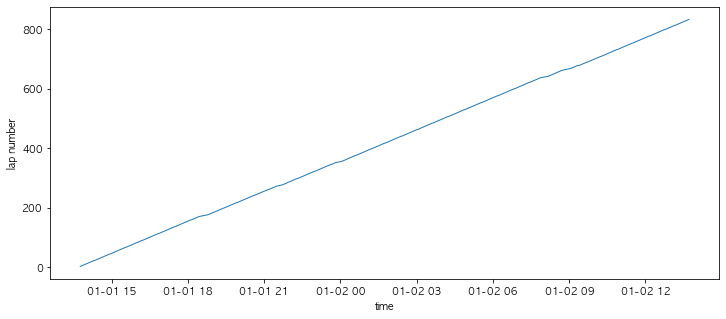

In [9]:
# one car
fig = plt.subplots(figsize=(12,5))
plotdata = data.loc[data['NUMBER'] == 5]
plt.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
plt.ylabel("lap number")
plt.xlabel("time");

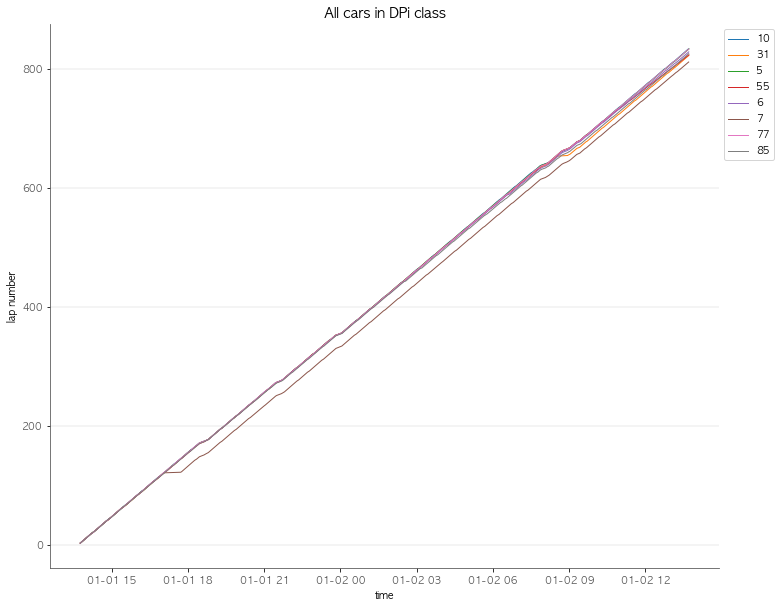

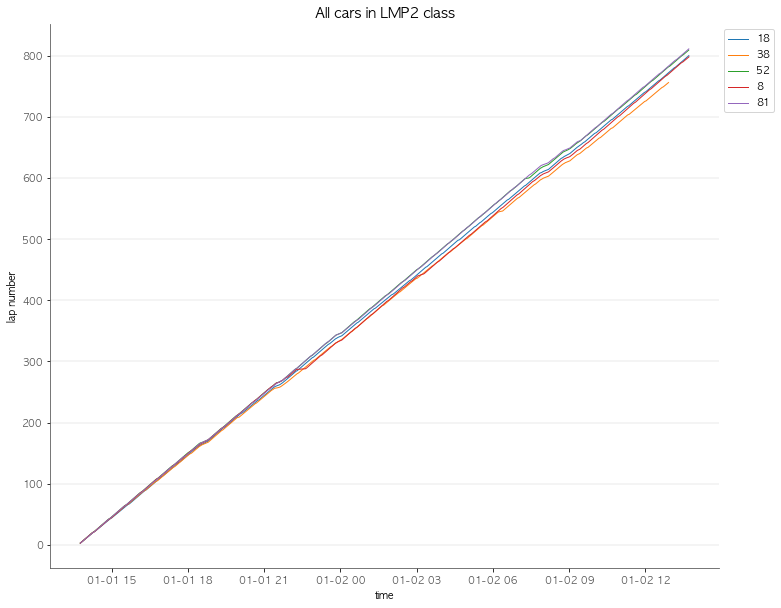

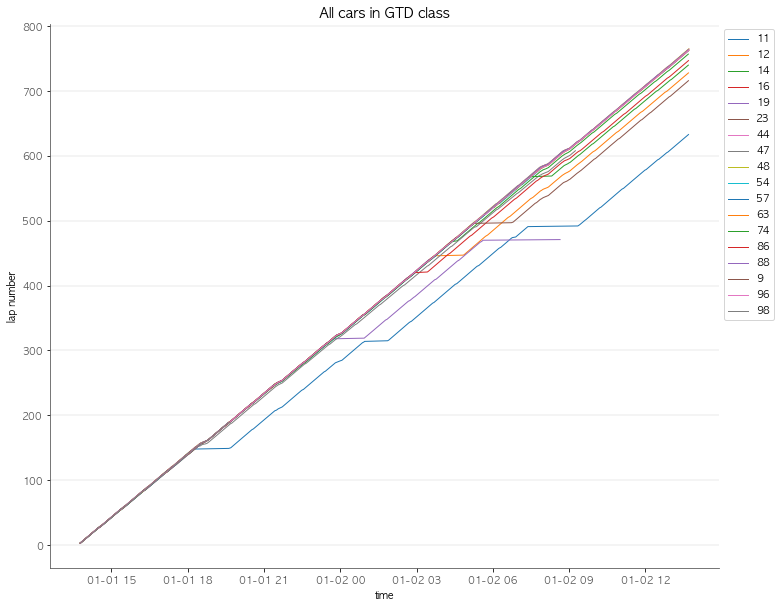

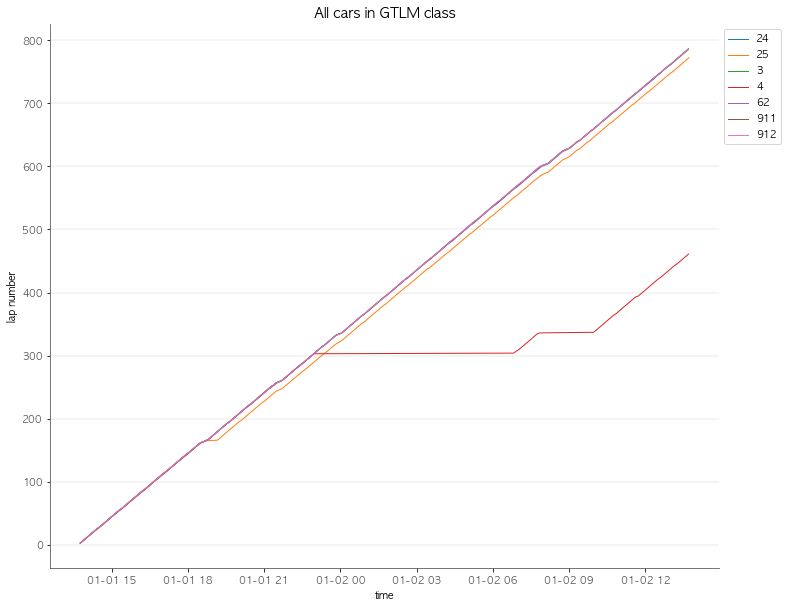

In [10]:
# plots for each class
classes = ("DPi", "LMP2", "GTD", "GTLM")
colors = {"P": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
for c in classes:
    fig, ax = plt.subplots(figsize=(12,10))
    temp = data.loc[data['CLASS'] == c]
    color = colors.get(c, '#D3D3D3')
    for i in  temp['NUMBER'].unique():
        plotdata = temp.loc[data['NUMBER'] == i]
        ax.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
    plt.ylabel("lap number")
    plt.xlabel("time")
    #plt.xlim(datetime.strptime("22:01:01.0", timeformat),datetime.strptime("22:51:01.0", timeformat))
    #plt.ylim(240,320)
    ax.legend(bbox_to_anchor=(1, 1), fancybox=True)
    title = "All cars in " + c + " class"
    ax.set_title(title, fontsize=14, y=1)
    ax.tick_params(labelcolor='#565656')
    ax.spines['bottom'].set_color('#565656')
    ax.spines['left'].set_color('#565656')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.show()
    plt.close(fig)

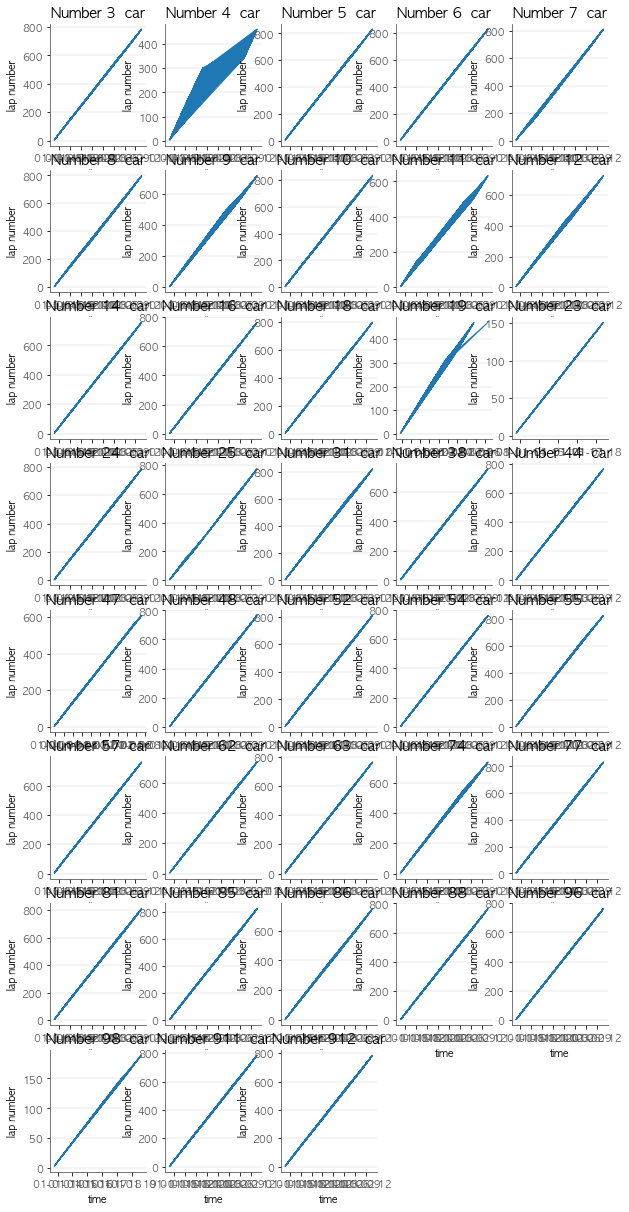

<Figure size 432x288 with 0 Axes>

In [25]:
# plot for each car
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
temp = data.sort_values(by='NUMBER')
fig = plt.figure(figsize=(10,40))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for r in temp['NUMBER'].unique():
    #fig, ax = plt.subplots(figsize=(5,3))
    i = i + 1
    ax = fig.add_subplot(15, 5, i)
    plotdata = temp.loc[data['NUMBER'] == r]
    color = colors.get(c, '#D3D3D3')
    ax.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
    plt.ylabel("lap number")
    plt.xlabel("time")
    title = "Number " + str(r) + "  car"
    ax.set_title(title, fontsize=14, y=1)
    ax.tick_params(labelcolor='#565656')
    ax.spines['bottom'].set_color('#565656')
    ax.spines['left'].set_color('#565656')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()
plt.tight_layout()
plt.close(fig)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

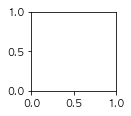

In [12]:
# plot for each car
colors = {"DPi": 'k', "LMP2": '#3d549f', "GTLM": '#d03037', "GTD": '#00ae3f'}
temp = data3.sort_values(by='NUMBER')
fig = plt.figure(figsize=(10,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for r in data['NUMBER'].unique():
    #fig, ax = plt.subplots(figsize=(5,3))
    i = i + 1
    ax = fig.add_subplot(15, 5, i)
    plotdata = plotdata.loc[data['NUMBER'] == r]
    color = colors.get(c, '#D3D3D3')
    ax.plot_date(plotdata['time'], plotdata['LAP_NUMBER'], label=i, markersize=0, linestyle='-', linewidth=1)
    plt.ylabel("lap number")
    plt.xlabel("time")
    title = "Number " + str(r) + "  car"
    #ax.set_title(title, fontsize=14, y=1)
    ax.set_title(title, fontsize=14, y=1)
    ax.tick_params(labelcolor='#565656')
    ax.spines['bottom'].set_color('#565656')
    ax.spines['left'].set_color('#565656')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='#565656', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
plt.tight_layout()
plt.show()
plt.close(fig)

In [ ]:
bardata = data[['NUMBER','CLASS','LAP_NUMBER']].groupby('NUMBER').max().reset_index().sort_values(by='LAP_NUMBER')
fig, ax2 = plt.subplots(figsize=(6,8))
bardata.plot.barh(x='NUMBER', y='LAP_NUMBER', ax=ax2, grid=False, legend=False, edgecolor = "none",\
                 color=[colors.get(i, '#D3D3D3') for i in bardata['CLASS']])
#ax2.legend(handles=patches, bbox_to_anchor=(1, 0), framealpha=0, markerfirst=False, \
#          loc='lower right', ncol=1, numpoints=1, fancybox=True, handlelength=.5)
ax2.tick_params(labelcolor='#565656')
ax2.set_xlabel('laps completed', fontsize=12)
ax2.xaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax2.yaxis.label.set_visible(False)
ax2.set_title('2020 Rolex 24 LEader Board', fontsize=14, y=1)
ax2.spines['bottom'].set_color('#565656')
ax2.spines['left'].set_color('#565656')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(color='#565656', axis='x', linestyle='-', linewidth=0.25, alpha=0.5)
# legend
hues = ["k", "#3d549f", "#d03037", "#00ae3f"]
texts = ["DPi", "LMP2", "GTLM", "GTD"]
patches = [ plt.plot([],[], color=hues[i], linewidth=10,\
                     label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
ax2.legend(handles=patches, bbox_to_anchor=(1.1, .7), framealpha=0, markerfirst=False, \
          loc='upper right', ncol=1, numpoints=1, fancybox=True, handlelength=.5);